In [137]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict

### Defining functions

In [138]:
def formatCircles(circlesData, circles):
    
    for i in range(10):
        circles.append([])
        sCircle = []
        k = 0
        for line in circlesData[i]:
            sCircle = line.split()
            iCircle = []
            for j in range(1,len(sCircle)):
                iCircle.append(int(sCircle[j]))
            circles[i].append([])
            circles[i][k] = iCircle
            k += 1

def formatFeatnames(data,featnames):
    
    for i in range(10):
        featnames.append([])
        for line in data[i]:
            splittedLine = line.split()
            word = ""
            for j in range(1,len(splittedLine)-1):
                word += splittedLine[j] + " "
            word += splittedLine[len(splittedLine)-1]
            featnames[i].append(word)

def createNodes(data,featnames,g):
  
    for line in data:
        splittedLine = line.split()
        j = int(splittedLine[0])
        g.add_node(j)
        k = 1
        for featname in featnames:
            g.nodes[j][featname] = int(splittedLine[k])
            k += 1

def createEdges(data,g):
    
    for line in data:
        words = line.split()
        e1 = int(words[0])
        e2 = int(words[1])
        g.add_edge(e1,e2)


### Reading datasets and processing data

In [139]:
emptyLists = [[]] * 10

circlesD = []
edgesD = []
featsD = []
featnamesD = []

for i in range(10):
    edgesD.append(open("../dataset/" + str(i) + ".edges","r"))
    featsD.append(open("../dataset/" + str(i) + ".feat","r"))
    featnamesD.append(open("../dataset/" + str(i) + ".featnames","r"))
    circlesD.append(open("../dataset/" + str(i) + ".circles","r"))

circles = []
featnames = []

formatFeatnames(featnamesD,featnames)
formatCircles(circlesD,circles)

### Building graphs

In [140]:
G0 = nx.Graph()
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()
G5 = nx.Graph()
G6 = nx.Graph()
G7 = nx.Graph()
G8 = nx.Graph()
G9 = nx.Graph()

# G[i] is the graph that represents dataset i.
G = [G0, G1, G2, G3, G4, G5, G6, G7, G8, G9]

for i in range(10):
    createNodes(featsD[i],featnames[i],G[i])
    createEdges(edgesD[i],G[i])

### Plotting G

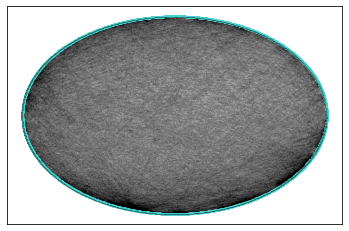

In [165]:
# One color for each graph:
colors = ['mediumspringgreen', 'mediumturquoise','blue','chocolate','orange','pink','purple','silver', 'violet','yellow',]

posG1 = nx.circular_layout(G[1], scale=1)  # positions for all nodes

labels = {}

for n in G[1].nodes:
    labels[n] = n

nx.draw_networkx(G[1],
                 pos=posG1,
                 label="Social Circles",
                 labels=labels,
                 with_labels=True,
                 font_size=1,
                 width=0.005,
                 node_color=colors[1],
                 node_size= 3
                 )

plt.show()

### Plotting the graph with all circles(cycles) of G

In [132]:
for circle in circles:
    g = nx.cycle_graph(circle)
    posg = nx.circular_layout(G)
    nx.draw_networkx(g,
                    pos=posg,
                    font_size=1,
                    width=0.5,
                    node_size=5
                    )
    
plt.show()

ValueError: too many values to unpack (expected 2)

### Closing Files

In [134]:
for i in range(10):
    cF[i].close()
    eF[i].close()
    fF[i].close()
    fnF[i].close()

NameError: name 'cF' is not defined